In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
Data=pd.read_csv('creditcard.csv').drop(['Time'],axis=1)

In [3]:
np.random.seed(1000)
Tr_num=int(len(Data)*0.8)
Samp=np.random.choice(len(Data),len(Data),replace=False)
Train=Data.iloc[Samp[:Tr_num]].reset_index(drop=True)
Test=Data.iloc[Samp[Tr_num:]].reset_index(drop=True)

In [4]:
Train_X=Train.drop(['Class'],axis=1)
Train_Y=Train['Class']
Test_X=Test.drop(['Class'],axis=1)
Test_Y=Test['Class']

In [5]:
Train_X[['Amount']].describe()

,Amount
count,227845.00000
mean,87.69166
std,243.90735
min,0.00000
25%,5.50000
50%,21.99000
75%,77.29000
max,25691.16000


In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.svm import OneClassSVM

In [180]:
Mod1=OneClassSVM(kernel='rbf',nu=0.00172)
Mod1=Mod1.fit(Train_X[Train_Y==0])

In [181]:
Pred1=Mod1.predict(Test_X)
Pred1[Pred1==1]=0
Pred1[Pred1==-1]=1

In [182]:
pd.crosstab(Test_Y,Pred1,rownames=['True'],colnames=['Pred'])

Pred,0,1
True,,
0,56718,126
1,97,21


In [11]:
nu1=(np.array(range(10))+1)*0.001
Rec1=[]
for i in nu1:
    Mod1S=OneClassSVM(kernel='rbf',nu=i)
    Mod1S=Mod1S.fit(Train_X[Train_Y==0])
    Pred1S=Mod1S.predict(Test_X)
    Pred1S[Pred1S==1]=0
    Pred1S[Pred1S==-1]=1
    Rec1=Rec1+[recall_score(Test_Y,Pred1S)]

0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.01


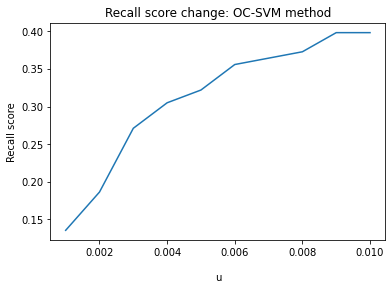

In [27]:
plt.plot(nu1,Rec1)
plt.xlabel('\nu')
plt.ylabel('Recall score')
plt.title('Recall score change: OC-SVM method')
plt.savefig('OC_SVM.png')

In [61]:
# Isolation Forest
from sklearn.ensemble import IsolationForest

In [19]:
np.random.seed(1000)
Mod2 = IsolationForest(n_estimators=50,contamination=0.00172, bootstrap=True)
Mod2=Mod2.fit(Train_X[Train_Y==0])

In [20]:
Pred2=Mod2.predict(Test_X)
Pred2[Pred2==1]=0
Pred2[Pred2==-1]=1

In [21]:
pd.crosstab(Test_Y,Pred2,rownames=['True'],colnames=['Pred'])

Pred,0,1
True,,
0,56731,113
1,87,31


In [64]:
nu2=(np.array(range(20))+1)*0.001
Rec2=[]
for i in nu2:
    np.random.seed(1000)
    Mod2S=IsolationForest(n_estimators=50,contamination=i, bootstrap=True)
    Mod2S=Mod2S.fit(Train_X[Train_Y==0])
    Pred2S=Mod2S.predict(Test_X)
    Pred2S[Pred2S==1]=0
    Pred2S[Pred2S==-1]=1
    Rec2=Rec2+[recall_score(Test_Y,Pred2S)]

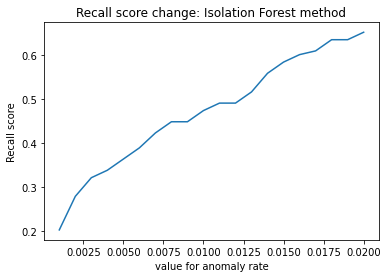

In [65]:
plt.plot(nu2,Rec2)
plt.xlabel('value for anomaly rate')
plt.ylabel('Recall score')
plt.title('Recall score change: Isolation Forest method')
plt.savefig('Iso_Forest.png')

In [ ]:
# Consider One-class ELM

In [7]:
def relu(x):
    return np.maximum(x, 0, x)

In [8]:
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H

In [9]:
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

In [46]:
np.random.seed(1000)
input_size=Train_X[Train_Y==0].shape[1]
hidden_size=100
input_weights=np.random.normal(size=[input_size,hidden_size])
biases=np.random.normal(size=[hidden_size])

In [47]:
output_weights = np.dot(scipy.linalg.pinv2(hidden_nodes(Train_X[Train_Y==0])), 
                        Train_Y[Train_Y==0]+1)
prediction = predict(Test_X)
Err=np.abs(prediction-1)

In [48]:
rate=0.00172
judge=np.quantile(Err,1-rate)
Pred3=np.array(list(map(int,(Err>judge).tolist())))

In [49]:
pd.crosstab(Test_Y,Pred3,rownames=['True'],colnames=['Pred'])

Pred,0,1
True,,
0,56794,50
1,70,48


In [39]:
hsz=(np.array(range(10))+1)*100
Rec3=[]
for i in hsz:
    np.random.seed(1000)
    hidden_size=i
    input_weights=np.random.normal(size=[input_size,hidden_size])
    biases=np.random.normal(size=[hidden_size])    
    output_weights = np.dot(scipy.linalg.pinv2(hidden_nodes(Train_X[Train_Y==0])), 
                        Train_Y[Train_Y==0]+1)
    prediction = predict(Test_X)
    Err=np.abs(prediction-1)
    rate=0.00172
    judge=np.quantile(Err,1-rate)
    Pred3S=np.array(list(map(int,(Err>judge).tolist()))) 
    print(pd.crosstab(Test_Y,Pred3S,rownames=['True'],colnames=['Pred']))
    Rec3=Rec3+[recall_score(Test_Y,Pred3S)]

Pred      0   1
True           
0     56794  50
1        70  48
Pred      0   1
True           
0     56776  68
1        88  30
Pred      0   1
True           
0     56787  57
1        77  41
Pred      0   1
True           
0     56788  56
1        76  42
Pred      0   1
True           
0     56774  70
1        90  28
Pred      0   1
True           
0     56769  75
1        95  23
Pred      0   1
True           
0     56778  66
1        86  32
Pred      0   1
True           
0     56784  60
1        80  38
Pred      0   1
True           
0     56782  62
1        82  36
Pred      0   1
True           
0     56776  68
1        88  30


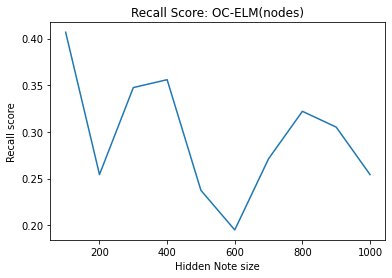

In [44]:
plt.plot(hsz,Rec3)
plt.xlabel('Hidden Note size')
plt.ylabel('Recall score')
plt.title('Recall Score: OC-ELM(nodes)')
plt.savefig('OC_ELM1.png')

In [50]:
np.random.seed(1000)
input_size=Train_X[Train_Y==0].shape[1]
hidden_size=100
input_weights=np.random.normal(size=[input_size,hidden_size])
biases=np.random.normal(size=[hidden_size])
output_weights = np.dot(scipy.linalg.pinv2(hidden_nodes(Train_X[Train_Y==0])), 
                        Train_Y[Train_Y==0]+1)
prediction = predict(Test_X)
Err=np.abs(prediction-1)

In [51]:
nu3=(np.array(range(20))+1)*0.001
Rec3S=[]
for i in nu3:
    rate=i
    judge=np.quantile(Err,1-rate)
    Pred3SS=np.array(list(map(int,(Err>judge).tolist())))
    Rec3S=Rec3S+[recall_score(Test_Y,Pred3SS)]

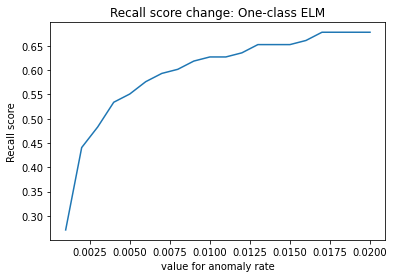

In [57]:
plt.plot(nu3,Rec3S)
plt.xlabel('value for anomaly rate')
plt.ylabel('Recall score')
plt.title('Recall score change: One-class ELM')
plt.savefig('OC_ELM2.png')

In [67]:
rate=0.01
judge=np.quantile(Err,1-rate)
Pred3=np.array(list(map(int,(Err>judge).tolist())))
pd.crosstab(Test_Y,Pred3,rownames=['True'],colnames=['Pred'])

Pred,0,1
True,,
0,56348,496
1,44,74


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic Regression

In [80]:
Mod_LR=LogisticRegression(class_weight='balanced')
Mod_LR=Mod_LR.fit(Train_X,Train_Y)

/Users/lihuayu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [81]:
Pred_LR=Mod_LR.predict(Test_X)
pd.crosstab(Test_Y,Pred_LR,rownames=['True'],colnames=['Pred'])

Pred,0,1
True,,
0,55233,1611
1,6,112


In [84]:
np.random.seed(1000)
Mod_RF=RandomForestClassifier(class_weight='balanced')
Mod_RF=Mod_LR.fit(Train_X,Train_Y)

/Users/lihuayu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [85]:
Pred_RF=Mod_RF.predict(Test_X)
pd.crosstab(Test_Y,Pred_RF,rownames=['True'],colnames=['Pred'])

Pred,0,1
True,,
0,55233,1611
1,6,112
